In [1]:
# import libraries
%matplotlib inline
import numpy as np
#import csv
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ulmo
import os
import scipy.spatial
import scipy.stats

In [6]:
city = 'Baltimore'
urbanID = 'USW00093784' # import sci center 
ruralID = 'USW00093721' # import bwi as rural 

urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                 as_dataframe=True, update = False)
ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                 as_dataframe=True, update = False)
#if ('TMIN' in urbandata.keys()) & ('TMIN' in ruraldata.keys()) & (np.intersect1d(urbandata['TMIN']['1985-01-01':].index, ruraldata['TMIN']['1985-01-01':].index).shape[0] > 300): 
######
###### Import data
######
rural_tmin = pd.to_numeric(ruraldata['TMIN']['1985-01-01':].value/10.) #rural tmin
urban_tmin = pd.to_numeric(urbandata['TMIN']['1985-01-01':].value/10.) 

# extract summertime data 
rural_summer = rural_tmin[(rural_tmin.index.month >= 6) & (rural_tmin.index.month <= 8)]
urban_summer = urban_tmin[(urban_tmin.index.month >= 6) & (urban_tmin.index.month <= 8)]

# clean data: eliminate min temperatures below 4 or above 35
rural_summer = rural_summer[(rural_summer>4) & (rural_summer<35)]
urban_summer = urban_summer[(urban_summer>4) & (urban_summer < 35)]

#calculate UHI
UHI = urban_summer - rural_summer

# for year in year, plot heatwave data 

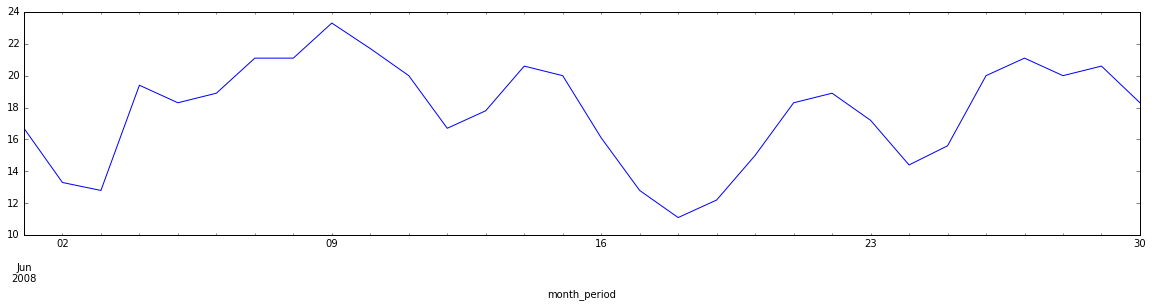

In [46]:
plt.figure(figsize= [20,4])
rural_summer[(rural_summer.index.year ==2008) & (rural_summer.index.month ==6) ].plot()

out of bounds
out of bounds
out of bounds
out of bounds
out of bounds


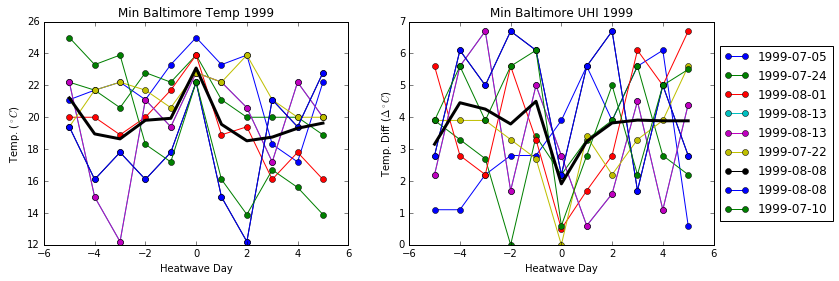

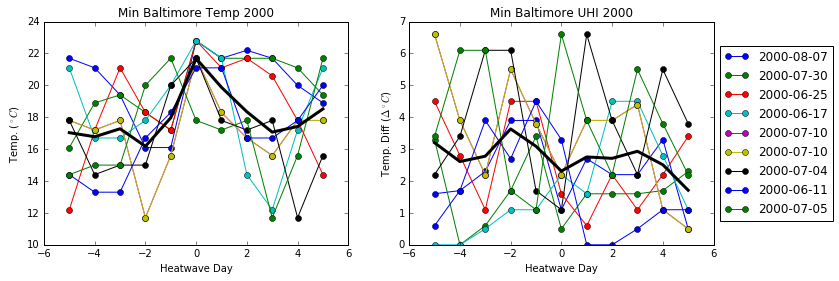

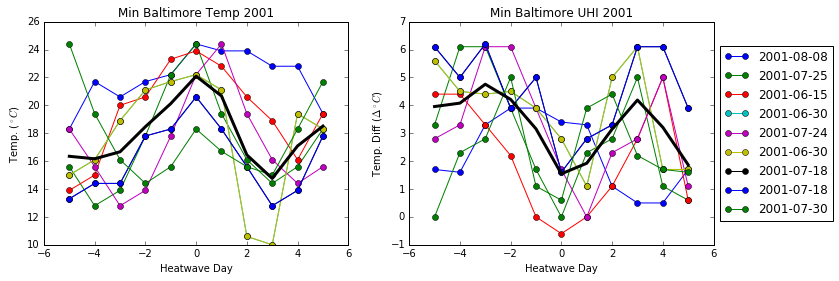

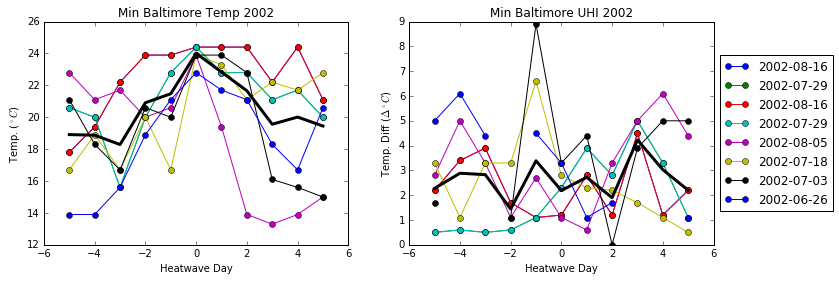

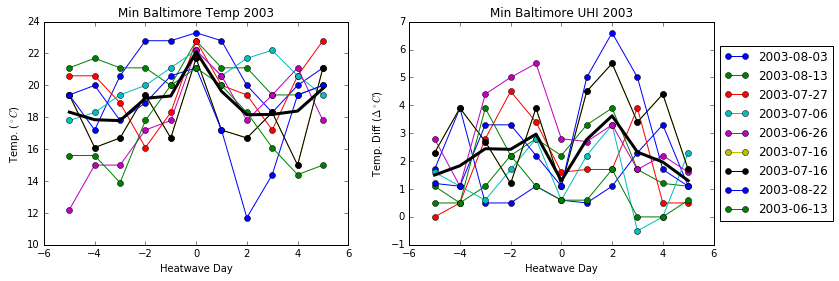

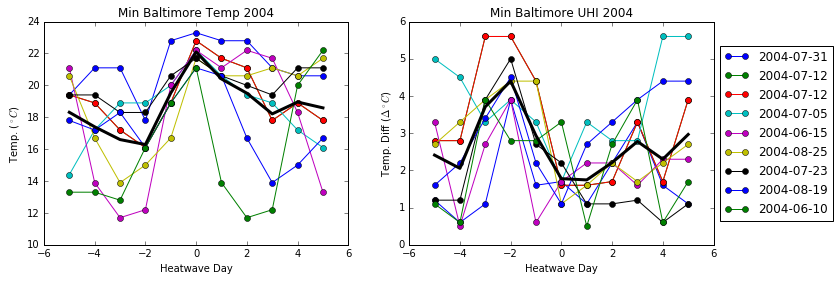

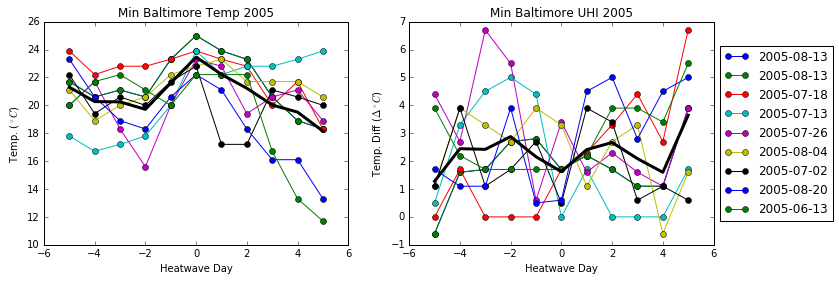

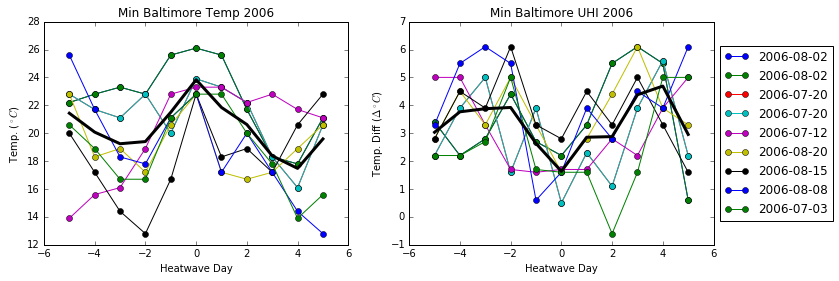

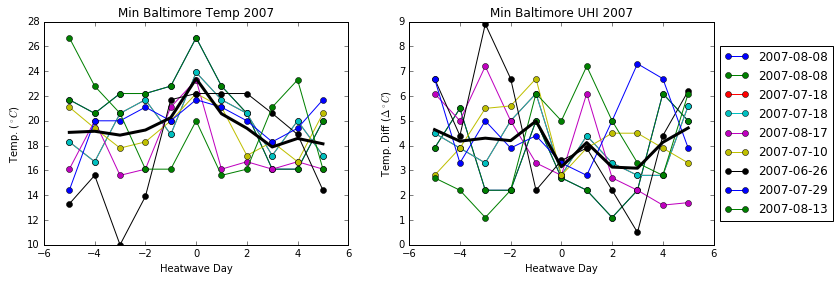

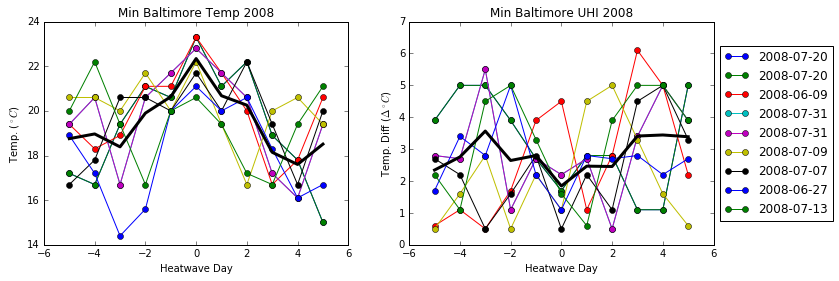

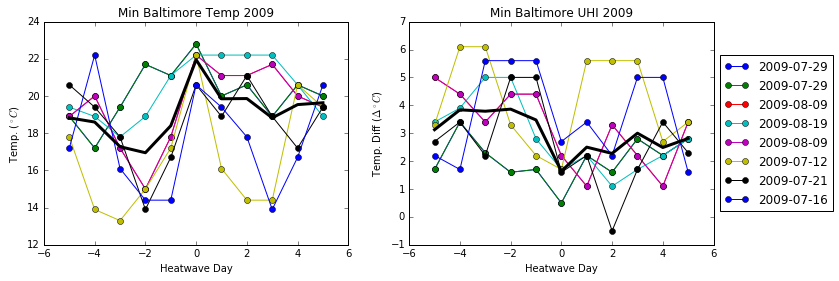

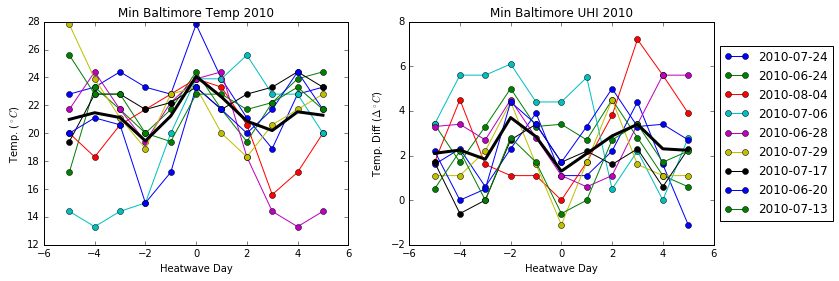

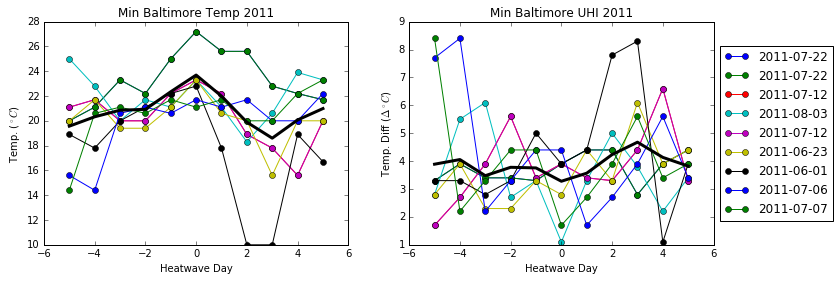

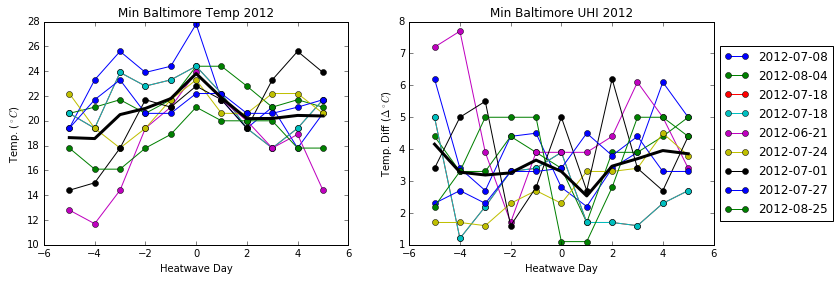

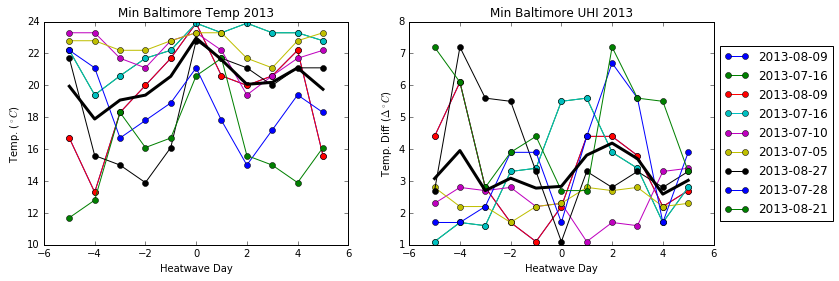

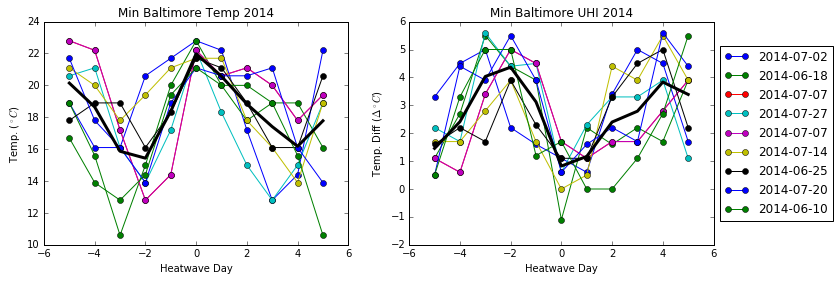

In [483]:
for year in range(1999, 2015): 
    temp = rural_summer[rural_summer.index.year ==year]

    numhw = 50
    finalhw = 10#50

    hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
    minheatwaves = hottestmin[0:20]

    Ns = []
    m = 0 
    for n in range(1,10): 
        old = m
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            minheatwaves = hottestmin[0:55]
            try: 
                while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                    m = m+1
            except IndexError: 
                print('out of bounds')
        try: 
            if old ==m : 
                Ns.append(minheatwaves.sort_index().index[m])
                #print(minheatwaves.sort_index().index[m])
            else: 
                Ns.append(minheatwaves.sort_index()[old:m].argmax())
                #print(minheatwaves.sort_index()[old:m].argmax())
        except: 
            'random error'
        m = m+1
    finalhw = hottestmin[Ns].sort_values(ascending=False)
    # Preallocate composite matrices to plot
    compositeTemp = np.zeros([finalhw.shape[0], 11])
    compositeUHI = np.zeros([finalhw.shape[0], 11])
    ii = 0
    for dates in finalhw.index[:]: 
        compositeTemp[ii,:]= rural_tmin[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
        compositeUHI[ii,:] = (urban_tmin-rural_tmin)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values# -UHI[dates.to_timestamp()]
        ii = ii+1

    plt.figure(figsize=[12,4])
    plt.subplot(1,2,1)
    tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
    plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
    plt.title('Min %s Temp %i'%(city, year))
    plt.ylabel('Temp. ($^\circ C$)')
    plt.xlabel('Heatwave Day')

    plt.subplot(1,2,2)    
    uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
    plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
    plt.title('Min %s UHI %i'%(city, year))
    plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
    plt.xlabel('Heatwave Day')
    plt.legend(finalhw.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))


In [30]:
rural_tmax = pd.to_numeric(ruraldata['TMAX']['1985-01-01':].value/10.) #rural tmin
urban_tmax = pd.to_numeric(urbandata['TMAX']['1985-01-01':].value/10.) 

# extract summertime data 
rural_summer_max = rural_tmax[(rural_tmax.index.month >= 6) & (rural_tmax.index.month <= 8)]
urban_summer_max = urban_tmax[(urban_tmax.index.month >= 6) & (urban_tmax.index.month <= 8)]

#calculate UHI
UHI_max = urban_summer_max - rural_summer_max

out of bounds
out of bounds


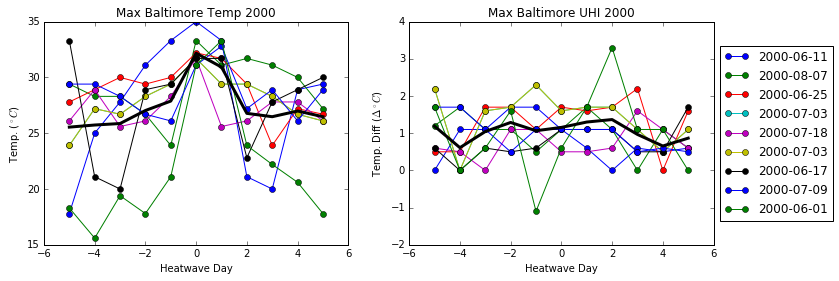

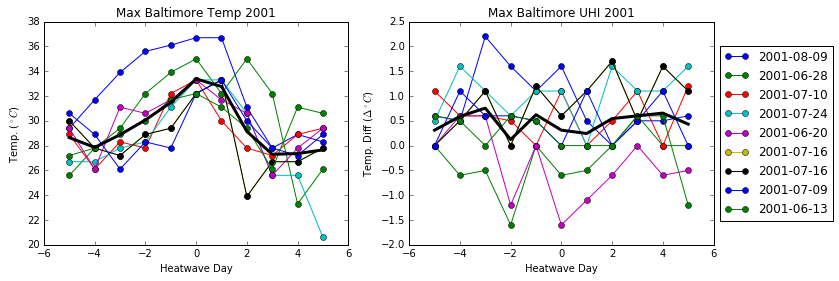

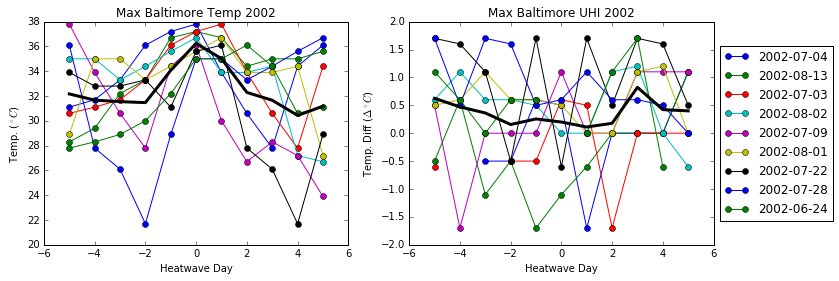

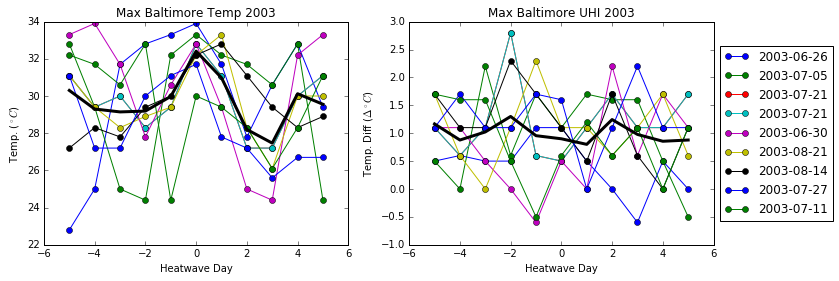

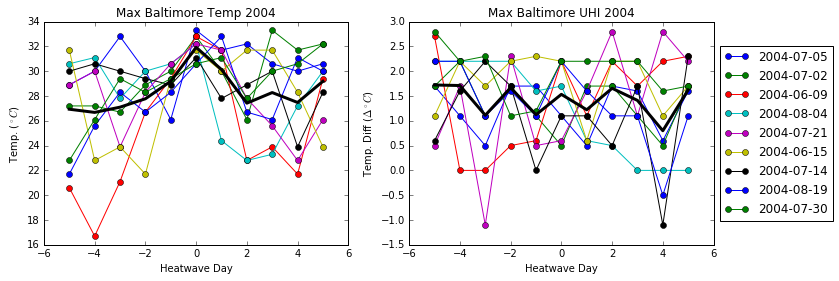

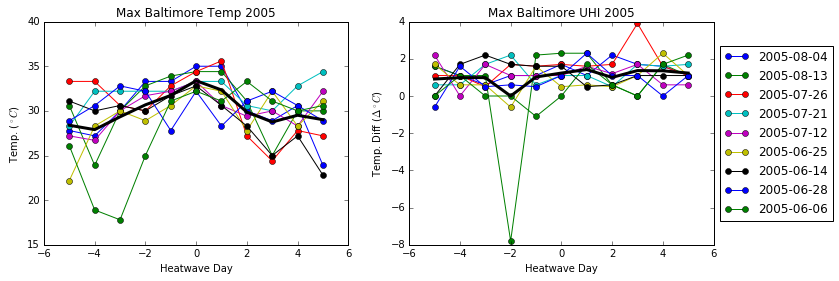

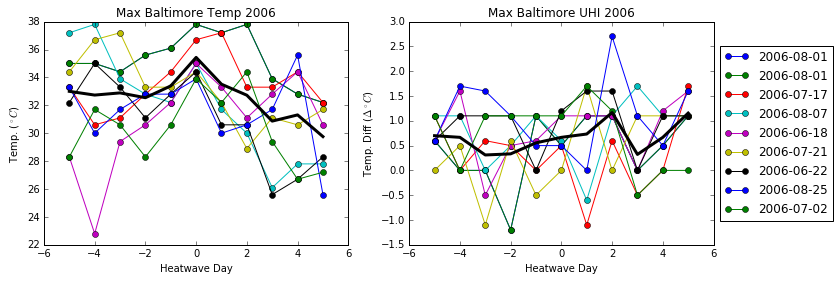

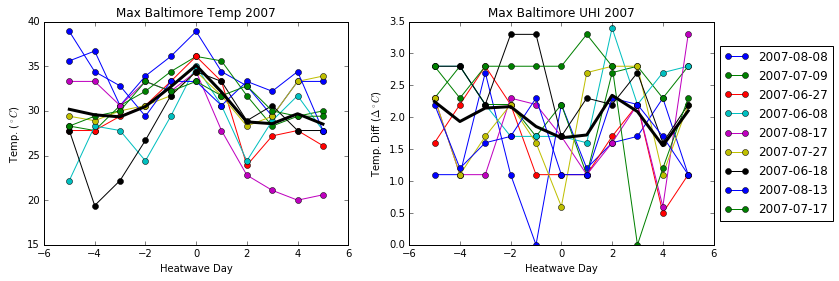

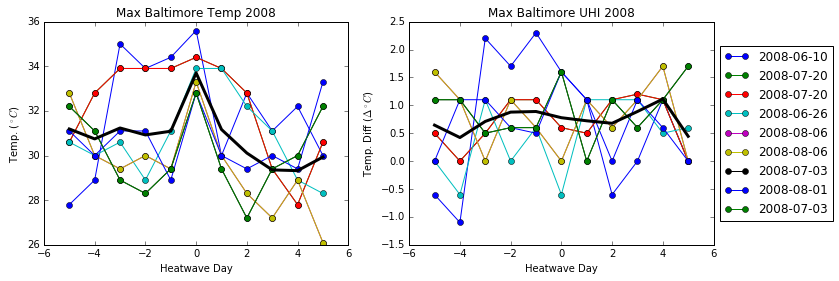

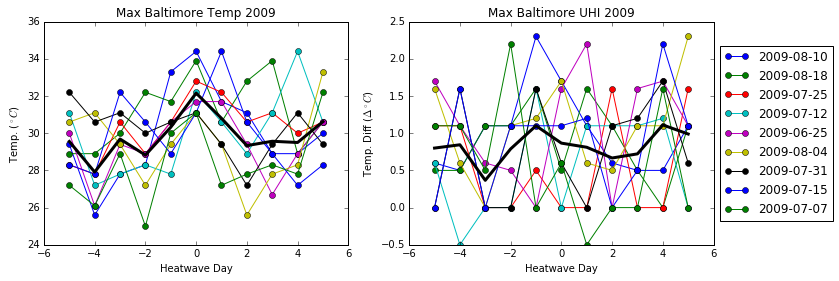

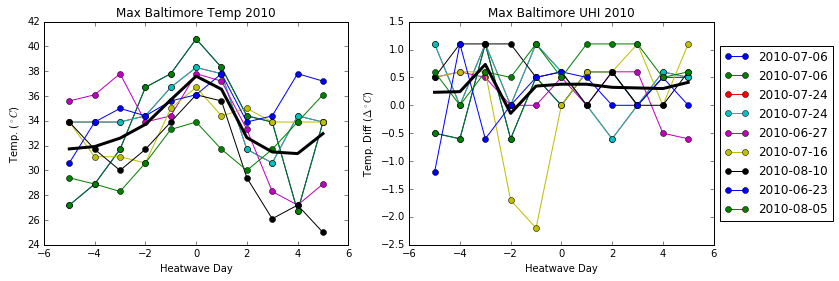

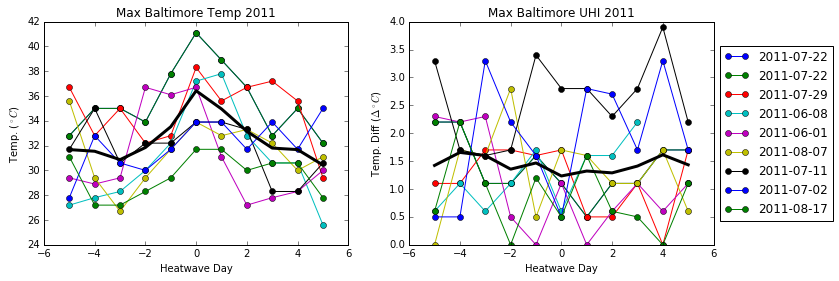

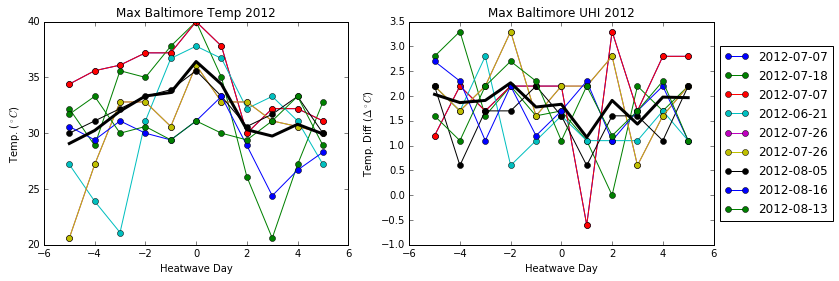

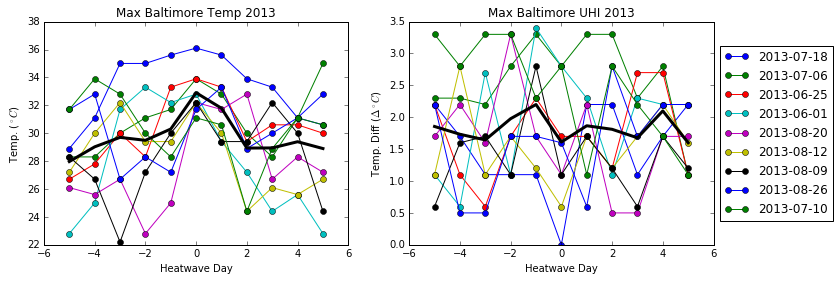

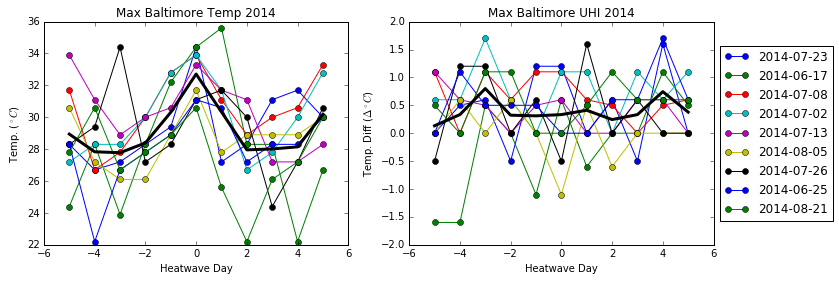

In [484]:
# do max analysis 
for year in range(2000, 2015): 
    temp = rural_summer_max[rural_summer_max.index.year ==year]
    numhw = 50
    finalhw = 10#50
    
#     minheatwaves = hottestmin[0:10]
#     hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
    
#     Ns = []
#     m = 0 
#     for n in range(1,10): 
#         old = m
#         try: 
#             while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(2, 'D') : 
#                 m = m+1
#         except IndexError: 
#             minheatwaves = hottestmin[0:m+10]
#             while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(2, 'D') : 
#                 m = m+1
#         if old ==m : 
#             Ns.append(minheatwaves.sort_index().index[m])
#         else: 
#             Ns.append(minheatwaves.sort_index()[old:m].argmax())
#         m = m+1
#     finalhw = minheatwaves[Ns].sort_values(ascending=False)
    hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
    minheatwaves = hottestmin[0:20]

    Ns = []
    m = 0 
    for n in range(1,10): 
        old = m
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            minheatwaves = hottestmin[0:55]
            try: 
                while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                    m = m+1
            except IndexError: 
                print('out of bounds')
        try: 
            if old ==m : 
                Ns.append(minheatwaves.sort_index().index[m])
            else: 
                Ns.append(minheatwaves.sort_index()[old:m].argmax())
        except: 
            'random error'
        m = m+1
    finalhw = hottestmin[Ns].sort_values(ascending=False)

    # Preallocate composite matrices to plot
    compositeTemp = np.zeros([finalhw.shape[0], 11])
    compositeUHI = np.zeros([finalhw.shape[0], 11])
    ii = 0
    for dates in finalhw.index[:]: 
        compositeTemp[ii,:]= rural_tmax[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
        compositeUHI[ii,:] = (urban_tmax-rural_tmax)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
        ii = ii+1

    plt.figure(figsize=[12,4])
    plt.subplot(1,2,1)
    tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
    plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), label = 'mean', linewidth = 3, color = 'black')
    plt.title('Max %s Temp %i'%(city, year))
    plt.ylabel('Temp. ($^\circ C$)')
    plt.xlabel('Heatwave Day')

    plt.subplot(1,2,2)    
    uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
    plt.legend(finalhw.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
    plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0),  label = 'mean',  linewidth = 3,color = 'black')
    plt.title('Max %s UHI %i'%(city, year))
    plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
    plt.xlabel('Heatwave Day')

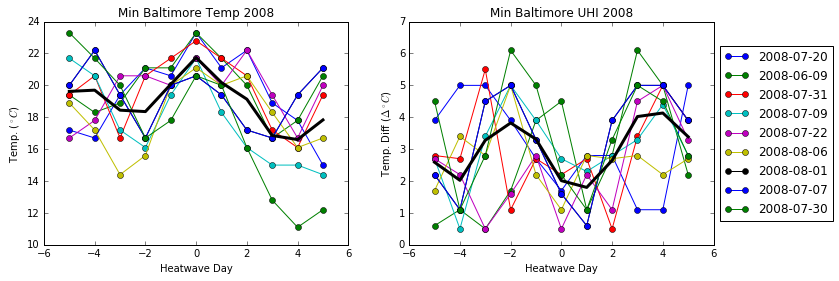

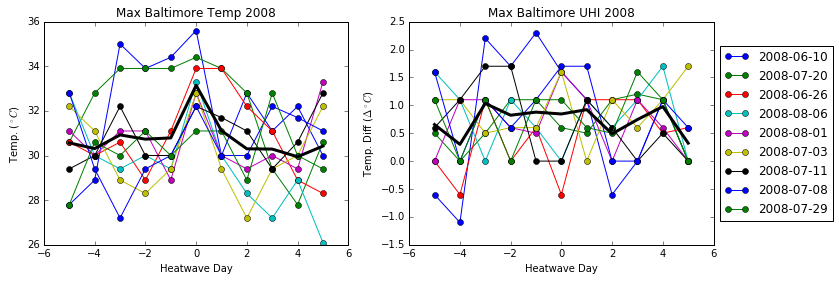

In [488]:
year = 2008

######Min 
temp = rural_summer[rural_summer.index.year ==year]

numhw = 50
finalhw = 10#50
hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
minheatwaves = hottestmin[0:25]
Ns = []
m = 0 
for n in range(1,10): 
    old = m
    try: 
        while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
            m = m+1
    except IndexError: 
        minheatwaves = hottestmin[0:55]
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            print('out of bounds')
    try: 
        if old ==m : 
            Ns.append(minheatwaves.sort_index().index[m])
            #print(minheatwaves.sort_index().index[m])
        else: 
            Ns.append(minheatwaves.sort_index()[old:m].argmax())
            #print(minheatwaves.sort_index()[old:m].argmax())
    except: 
        'random error'
    m = m+1
finalhw = hottestmin[Ns].sort_values(ascending=False)

# Preallocate composite matrices to plot
compositeTemp = np.zeros([finalhw.shape[0], 11])
compositeUHI = np.zeros([finalhw.shape[0], 11])
ii = 0
for dates in finalhw.index[:]: 
    compositeTemp[ii,:]= rural_tmin[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    compositeUHI[ii,:] = (urban_tmin-rural_tmin)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values# -UHI[dates.to_timestamp()]
    ii = ii+1

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
plt.title('Min %s Temp %i'%(city, year))
plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.legend(minheatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
plt.title('Min %s UHI %i'%(city, year))
plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
plt.xlabel('Heatwave Day')

##### Max 
temp = rural_summer_max[rural_summer_max.index.year ==year]
numhw = 50
finalhw = 10#50

hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
minheatwaves = hottestmin[0:25]
Ns = []
m = 0 
for n in range(1,10): 
    old = m
    try: 
        while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
            m = m+1
    except IndexError: 
        minheatwaves = hottestmin[0:55]
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            print('out of bounds')
    try: 
        if old ==m : 
            Ns.append(minheatwaves.sort_index().index[m])
            #print(minheatwaves.sort_index().index[m])
        else: 
            Ns.append(minheatwaves.sort_index()[old:m].argmax())
            #print(minheatwaves.sort_index()[old:m].argmax())
    except: 
        'random error'
    m = m+1
finalhw = hottestmin[Ns].sort_values(ascending=False)

# Preallocate composite matrices to plot
compositeTemp = np.zeros([finalhw.shape[0], 11])
compositeUHI = np.zeros([finalhw.shape[0], 11])
ii = 0
for dates in finalhw.index[:]: 
    compositeTemp[ii,:]= rural_tmax[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    compositeUHI[ii,:] = (urban_tmax-rural_tmax)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    ii = ii+1

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
plt.title('Max %s Temp %i'%(city, year))
plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.legend(finalhw.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
plt.title('Max %s UHI %i'%(city, year))
plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
plt.xlabel('Heatwave Day')
#plt.legend(finalhw.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))

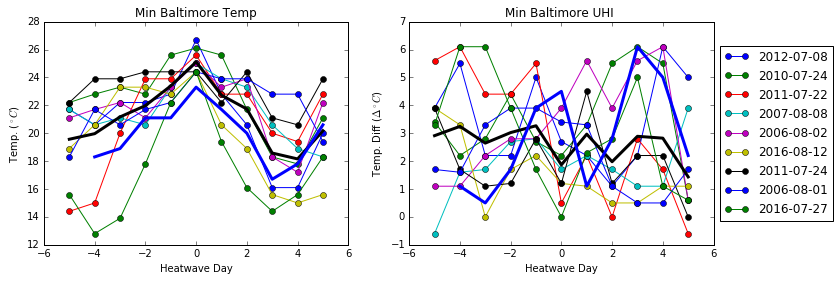

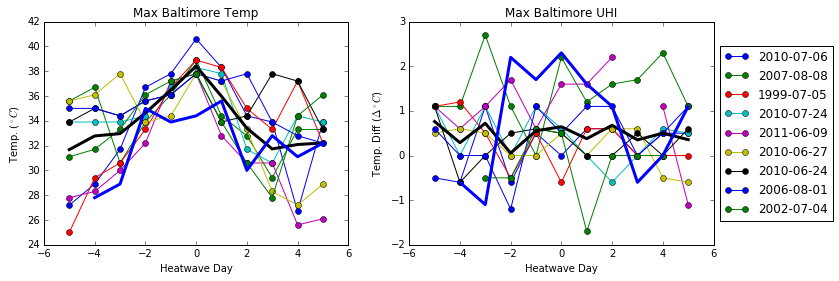

In [514]:
######Min 
year = 1998
temp = rural_summer[rural_summer.index.year> year]#[]

numhw = 50
finalhw = 10#50
hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
minheatwaves = hottestmin[0:25]
Ns = []
m = 0 
for n in range(1,10): 
    old = m
    try: 
        while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
            m = m+1
    except IndexError: 
        minheatwaves = hottestmin[0:55]
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            print('out of bounds')
    try: 
        if old ==m : 
            Ns.append(minheatwaves.sort_index().index[m])
            #print(minheatwaves.sort_index().index[m])
        else: 
            Ns.append(minheatwaves.sort_index()[old:m].argmax())
            #print(minheatwaves.sort_index()[old:m].argmax())
    except: 
        'random error'
    m = m+1
finalhw = hottestmin[Ns].sort_values(ascending=False)

# Preallocate composite matrices to plot
compositeTemp = np.zeros([finalhw.shape[0], 11])
compositeUHI = np.zeros([finalhw.shape[0], 11])
ii = 0
for dates in finalhw.index[:]: 
    compositeTemp[ii,:]= rural_tmin[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    compositeUHI[ii,:] = (urban_tmin-rural_tmin)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values# -UHI[dates.to_timestamp()]
    ii = ii+1

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
plt.plot(np.arange(-4,6,1), rural_summer['2008-06-05':'2008-06-14'],  linewidth = 3, color = 'blue')

plt.title('Min %s Temp'%(city))
plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.legend(minheatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
plt.plot(np.arange(-4,6,1), (urban_tmin-rural_tmin)['2008-06-05':'2008-06-14'], linewidth = 3, color = 'blue')

plt.title('Min %s UHI '%(city))
plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
plt.xlabel('Heatwave Day')

##### Max 
temp = rural_summer_max[rural_summer_max.index.year> year]
numhw = 50
finalhw = 10#50

hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
minheatwaves = hottestmin[0:25]
Ns = []
m = 0 
for n in range(1,10): 
    old = m
    try: 
        while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
            m = m+1
    except IndexError: 
        minheatwaves = hottestmin[0:55]
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            print('out of bounds')
    try: 
        if old ==m : 
            Ns.append(minheatwaves.sort_index().index[m])
            #print(minheatwaves.sort_index().index[m])
        else: 
            Ns.append(minheatwaves.sort_index()[old:m].argmax())
            #print(minheatwaves.sort_index()[old:m].argmax())
    except: 
        'random error'
    m = m+1
finalhw = hottestmin[Ns].sort_values(ascending=False)

# Preallocate composite matrices to plot
compositeTemp = np.zeros([finalhw.shape[0], 11])
compositeUHI = np.zeros([finalhw.shape[0], 11])
ii = 0
for dates in finalhw.index[:]: 
    compositeTemp[ii,:]= rural_tmax[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    compositeUHI[ii,:] = (urban_tmax-rural_tmax)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    ii = ii+1

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
plt.plot(np.arange(-4,6,1), rural_summer_max['2008-06-05':'2008-06-14'], linewidth = 3, color = 'blue')
plt.title('Max %s Temp'%(city))
plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.legend(finalhw.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
plt.plot(np.arange(-4,6,1), (urban_tmax-rural_tmax)['2008-06-05':'2008-06-14'], linewidth = 3, color = 'blue')

plt.title('Max %s UHI'%(city))
plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
plt.xlabel('Heatwave Day')

The heatwave analyzed in Li \& Bou-Zeid et al takes place from June 5-14, 2008. This heatwave event was one of the warmer events for both $T_{max}$ and $T_{min}$ for 2008, though it is worth noting that 2008 was not a particularly hot year, and that the 2008 heatwave is not one of the 10 hottest heatwave events for the period 1999-2016 (when station data is available for similar stations). 

Furthermore, when we use stations identified by our pairing algorithm, 

In [517]:
pairs = pd.read_csv('CleanedNovUSpairs_stationlengths.csv').drop(2)

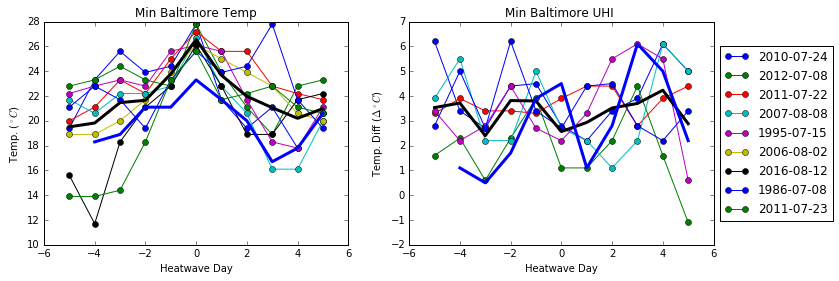

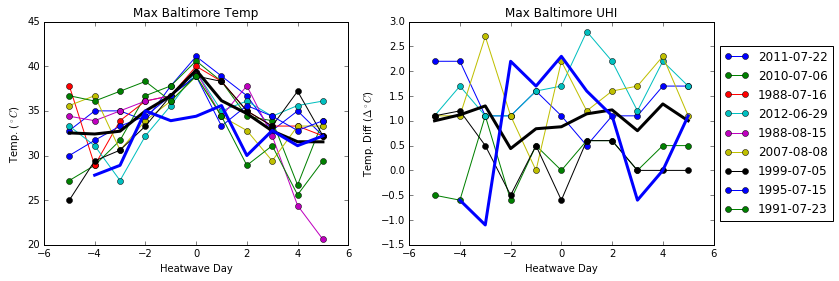

In [581]:
my_urban = pairs[pairs.City=='Baltimore']['Urban station']
my_rural = pairs[pairs.City=='Baltimore']['Rural station']

urbandata = ulmo.ncdc.ghcn_daily.get_data(urbanID,
                                 as_dataframe=True, update = False)
ruraldata = ulmo.ncdc.ghcn_daily.get_data(ruralID,
                                 as_dataframe=True, update = False)

rural_tmin = pd.to_numeric(ruraldata['TMIN']['1985-01-01':].value/10.) #rural tmin
urban_tmin = pd.to_numeric(urbandata['TMIN']['1985-01-01':].value/10.) 

# extract summertime data 
rural_summer = rural_tmin[(rural_tmin.index.month >= 6) & (rural_tmin.index.month <= 8)]
urban_summer = urban_tmin[(urban_tmin.index.month >= 6) & (urban_tmin.index.month <= 8)]

# clean data: eliminate min temperatures below 4 or above 35
rural_summer = rural_summer[(rural_summer>4) & (rural_summer<35)]
urban_summer = urban_summer[(urban_summer>4) & (urban_summer < 35)]

#calculate UHI
UHI = urban_summer - rural_summer

### tmax
rural_tmax = pd.to_numeric(ruraldata['TMAX']['1985-01-01':].value/10.) #rural tmin
urban_tmax = pd.to_numeric(urbandata['TMAX']['1985-01-01':].value/10.) 

# extract summertime data 
rural_summer_max = rural_tmax[(rural_tmax.index.month >= 6) & (rural_tmax.index.month <= 8)]
urban_summer_max = urban_tmax[(urban_tmax.index.month >= 6) & (urban_tmax.index.month <= 8)]

##### plot 
temp = rural_summer#[rural_summer.index.year> year]#[]

numhw = 50
finalhw = 10#50
hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
minheatwaves = hottestmin[0:12]
Ns = []
m = 0 
for n in range(1,10): 
    old = m
    try: 
        while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
            m = m+1
    except IndexError: 
        minheatwaves = hottestmin[0:20]
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            print('out of bounds')
    try: 
        if old ==m : 
            Ns.append(minheatwaves.sort_index().index[m])
            #print(minheatwaves.sort_index().index[m])
        else: 
            Ns.append(minheatwaves.sort_index()[old:m].argmax())
            #print(minheatwaves.sort_index()[old:m].argmax())
    except: 
        'random error'
    m = m+1
finalhw = hottestmin[Ns].sort_values(ascending=False)

# Preallocate composite matrices to plot
compositeTemp = np.zeros([finalhw.shape[0], 11])
compositeUHI = np.zeros([finalhw.shape[0], 11])
ii = 0
for dates in finalhw.index[:]: 
    compositeTemp[ii,:]= rural_tmin[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    compositeUHI[ii,:] = (urban_tmin-rural_tmin)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values# -UHI[dates.to_timestamp()]
    ii = ii+1

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
plt.plot(np.arange(-4,6,1), rural_summer['2008-06-05':'2008-06-14'],  linewidth = 3, color = 'blue')

plt.title('Min %s Temp'%(city))
plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.legend(minheatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
plt.plot(np.arange(-4,6,1), (urban_tmin-rural_tmin)['2008-06-05':'2008-06-14'], linewidth = 3, color = 'blue')

plt.title('Min %s UHI '%(city))
plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
plt.xlabel('Heatwave Day')

# ##### Max 
temp = rural_summer_max#[rural_summer_max.index.year> year]
numhw = 50
finalhw = 10#50

hottestmin = temp.iloc[(-temp.values).argsort()[:numhw]] 
minheatwaves = hottestmin[0:12]
Ns = []
m = 0 
for n in range(1,10): 
    old = m
    try: 
        while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
            m = m+1
    except IndexError: 
        minheatwaves = hottestmin[0:20]
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            print('out of bounds')
    try: 
        if old ==m : 
            Ns.append(minheatwaves.sort_index().index[m])
        else: 
            Ns.append(minheatwaves.sort_index()[old:m].argmax())
    except: 
        'random error'
    m = m+1
finalhw = hottestmin[Ns].sort_values(ascending=False)

# Preallocate composite matrices to plot
compositeTemp = np.zeros([finalhw.shape[0], 11])
compositeUHI = np.zeros([finalhw.shape[0], 11])
ii = 0
for dates in finalhw.index[:]: 
    compositeTemp[ii,:]= rural_tmax[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    compositeUHI[ii,:] = (urban_tmax-rural_tmax)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    ii = ii+1

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
plt.plot(np.arange(-4,6,1), rural_summer_max['2008-06-05':'2008-06-14'], linewidth = 3, color = 'blue')
plt.title('Max %s Temp'%(city))
plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.legend(finalhw.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
plt.plot(np.arange(-4,6,1), (urban_tmax-rural_tmax)['2008-06-05':'2008-06-14'], linewidth = 3, color = 'blue')

plt.title('Max %s UHI'%(city))
plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
plt.xlabel('Heatwave Day')

month_period
2011-07-22    41.1
2010-07-06    40.6
2012-07-18    40.0
1988-07-16    40.0
2012-07-07    40.0
1988-08-15    39.4
2012-06-29    39.4
2007-08-08    38.9
1995-07-15    38.9
1999-07-05    38.9
1991-07-23    38.9
2011-07-23    38.9
Freq: D, Name: value, dtype: float64